In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Filter analysis

In this section, we analyze all `logsBloom` filters contained in the first 15 million blocks of the Ethereum blockchain.

For each block, we store the corresponding timestamp, the number of bits set to 1 in the filter (`numOnes`) and the ratio between `numOnes` and total number of bits `numBits` (i.e., 2048).

In [2]:
dfs = []
for i in range(0, 15):
    start = i*1000000
    end = start + 999999
    dfs.append(pd.read_csv('data/filters_ones_{}-{}.csv'.format(start, end), header=None))
filters_ones = pd.concat(dfs)
filters_ones.columns = ['blockId', 'timestamp', 'numOnes']
filters_ones['timestamp'] = filters_ones['timestamp'].values.astype(dtype='datetime64[s]')
filters_ones['numBits'] = 2048
filters_ones['ratio'] = filters_ones['numOnes'] / filters_ones['numBits']
filters_ones.head()

,blockId,timestamp,numOnes,numBits,ratio
0,0,1970-01-01 00:00:00,0,2048,0.0
1,1,2015-07-30 15:26:28,0,2048,0.0
2,2,2015-07-30 15:26:57,0,2048,0.0
3,3,2015-07-30 15:27:28,0,2048,0.0
4,4,2015-07-30 15:27:57,0,2048,0.0


We print some basic statistics (i.e., average number of ones, standard deviation and average ratio).

In [3]:
print('Avg. number of ones\t: {}\nStd. deviation\t\t: {}'.format(filters_ones.numOnes.mean(),filters_ones.numOnes.std()))
print('Avg. ratio\t\t: {}'.format(filters_ones.ratio.mean()))

Avg. number of ones	: 417.7440142666667
Std. deviation		: 371.3960266976995
Avg. ratio		: 0.20397656946614584


Then we plot the distribution of the number of bits set to 1.

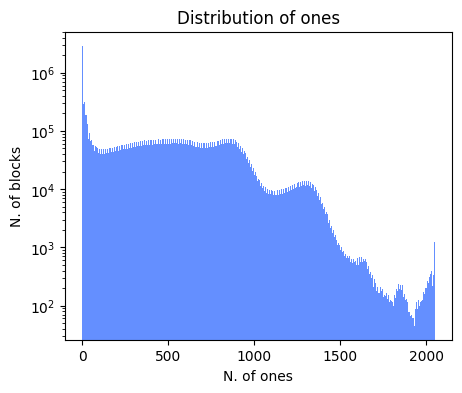

In [4]:
plt.figure(figsize=(5, 4))
plt.title('Distribution of ones')
plt.xlabel('N. of ones')
plt.ylabel('N. of blocks')
plt.yscale('log')
plt.hist(filters_ones['numOnes'], bins='auto', color='#648fff')
plt.savefig("figures/dist_ones.pdf", format='pdf', bbox_inches='tight')
plt.show()

Now we compute the average number of ones and ratio for each year.

In [14]:
x = filters_ones.groupby([filters_ones.timestamp.dt.year]).mean('numOnes').drop(['blockId'], axis=1)
x.drop(index=x.index[0], axis=0, inplace=True)
x

,numOnes,numBits,ratio
timestamp,,,
2015,0.914518,2048.0,0.000447
2016,6.727867,2048.0,0.003285
2017,111.158306,2048.0,0.054277
2018,362.787394,2048.0,0.177142
2019,447.308092,2048.0,0.218412
2020,632.564766,2048.0,0.308870
2021,805.251780,2048.0,0.393189
2022,808.040508,2048.0,0.394551


In [16]:
filters_ones.groupby([filters_ones.timestamp.dt.year]).count()

,blockId,timestamp,numOnes,numBits,ratio
timestamp,,,,,
1970,1,1,1,1,1
2015,778482,778482,778482,778482,778482
2016,2133924,2133924,2133924,2133924,2133924
2017,1920279,1920279,1920279,1920279,1920279
2018,2155929,2155929,2155929,2155929,2155929
2019,2204651,2204651,2204651,2204651,2204651
2020,2371753,2371753,2371753,2371753,2371753
2021,2351147,2351147,2351147,2351147,2351147
2022,1083834,1083834,1083834,1083834,1083834


In [13]:
xl = x[['numOnes', 'ratio']]
xl['numOnes'] = xl['numOnes'].round(2)
xl['ratio'] *= 100
xl['ratio'] = xl['ratio'].round(2)
print(xl.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  numOnes &  ratio \\
timestamp &          &        \\
\midrule
2015      &     0.91 &   0.04 \\
2016      &     6.73 &   0.33 \\
2017      &   111.16 &   5.43 \\
2018      &   362.79 &  17.71 \\
2019      &   447.31 &  21.84 \\
2020      &   632.56 &  30.89 \\
2021      &   805.25 &  39.32 \\
2022      &   808.04 &  39.46 \\
\bottomrule
\end{tabular}



/var/folders/gm/grbx3p550ps44z3jf7l2r4700000gn/T/ipykernel_2888/3895306462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xl['numOnes'] = xl['numOnes'].round(2)
/var/folders/gm/grbx3p550ps44z3jf7l2r4700000gn/T/ipykernel_2888/3895306462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xl['ratio'] *= 100
/var/folders/gm/grbx3p550ps44z3jf7l2r4700000gn/T/ipykernel_2888/3895306462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

We plot the average number of ones per year.

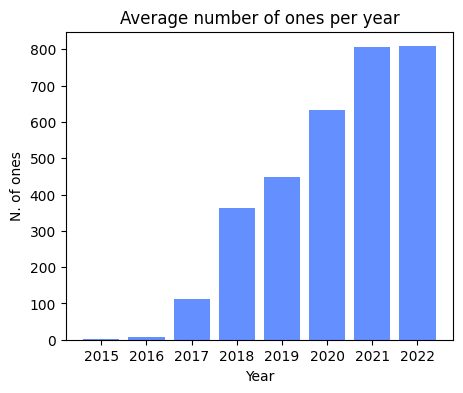

In [17]:
plt.figure(figsize=(5, 4))
plt.title('Average number of ones per year')
plt.xlabel('Year')
plt.ylabel('N. of ones')
plt.bar(x.index, x.numOnes, color='#648fff')
plt.savefig("figures/ones_year.pdf", format='pdf', bbox_inches='tight')
plt.show()

We do the same for the ratio.

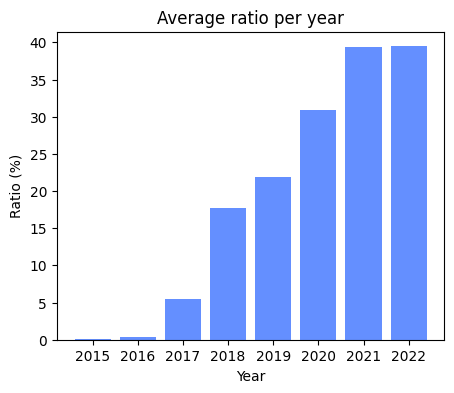

In [18]:
plt.figure(figsize=(5, 4))
plt.title('Average ratio per year')
plt.xlabel('Year')
plt.ylabel('Ratio (%)')
plt.bar(x.index, x.ratio*100, color='#648fff')
plt.savefig("figures/ratio_year.pdf", format='pdf', bbox_inches='tight')
plt.show()

# Receipt analysis

In this section we conduct an analysis of the TX receipts for all blocks in our data set.

In [21]:
receipts = pd.read_csv('data/receipt_stats_0-14999999.csv.xz', compression='xz', header=None)
receipts.columns = ['blockId', 'txCount', 'numLogs', 'numKeys', 'numDistKeys']
receipts['timestamp'] = filters_ones['timestamp'].values
receipts.head()

,blockId,txCount,numLogs,numKeys,numDistKeys,timestamp
0,0,0,0,0,0,1970-01-01 00:00:00
1,1,0,0,0,0,2015-07-30 15:26:28
2,2,0,0,0,0,2015-07-30 15:26:57
3,3,0,0,0,0,2015-07-30 15:27:28
4,4,0,0,0,0,2015-07-30 15:27:57


In [46]:
# Check that the length is correct (should be 15000000).
assert len(receipts) == 15000000

We first print some basic statistics about all blocks.

In [34]:
data = [
    ['Transactions', receipts.txCount.mean(), receipts.txCount.std()],
    ['Logs', receipts.numLogs.mean(), receipts.numLogs.std()],
    ['Keys', receipts.numKeys.mean(), receipts.numKeys.std()],
    ['Unique keys', receipts.numDistKeys.mean(), receipts.numDistKeys.std()]
]
basic_receipt_stats = pd.DataFrame(data, columns=['Attribute', 'Average', 'Std. deviation']).set_index('Attribute')
basic_receipt_stats

,Average,Std. deviation
Attribute,,
Transactions,107.577962,101.440702
Logs,136.336956,161.023985
Keys,513.159945,641.257230
Unique keys,177.330260,188.956036


Then we plot the distribution of the number of keys.

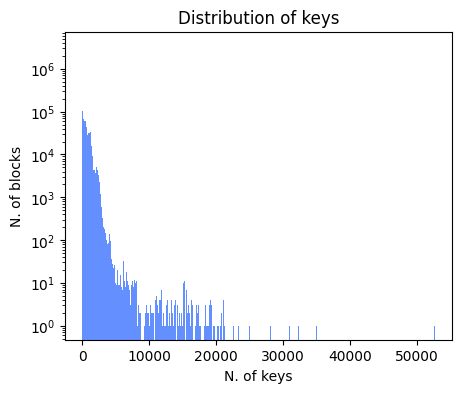

In [35]:
plt.figure(figsize=(5, 4))
plt.title('Distribution of keys')
plt.xlabel('N. of keys')
plt.ylabel('N. of blocks')
plt.yscale('log')
plt.hist(receipts['numKeys'], bins='auto', color='#648fff')
plt.savefig("figures/dist_keys.pdf", format='pdf', bbox_inches='tight')
plt.show()

We repeat this process for *unique* keys. The shape of the distribution is similar to the one of the previous experiment.

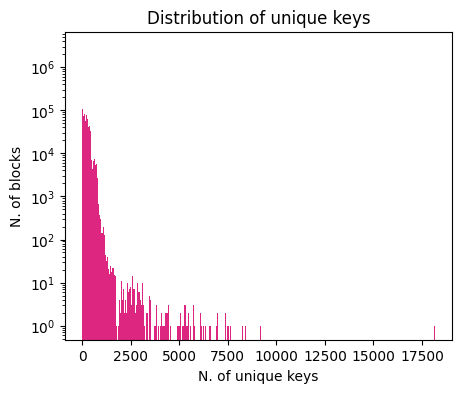

In [44]:
plt.figure(figsize=(5, 4))
plt.title('Distribution of unique keys')
plt.xlabel('N. of unique keys')
plt.ylabel('N. of blocks')
plt.yscale('log')
plt.hist(receipts['numDistKeys'], bins='auto', color='#dc267f')
plt.savefig("figures/dist_unique_keys.pdf", format='pdf', bbox_inches='tight')
plt.show()

We compute some statistics on a yearly basis. We are interested in the average number of transactions, the average number of logs and the average number of keys.

In [38]:
y = receipts.groupby([receipts.timestamp.dt.year]).mean('numKeys').drop(['blockId'], axis=1)
y.drop(index=y.index[0], axis=0, inplace=True)
y

,txCount,numLogs,numKeys,numDistKeys
timestamp,,,,
2015,1.344005,0.401634,1.463573,0.307602
2016,6.401859,1.782235,6.145964,2.269312
2017,53.607332,28.958577,96.622158,39.921924
2018,116.500371,98.452620,357.626466,137.481850
2019,110.145377,112.603559,431.356084,176.914349
2020,145.363775,201.884662,743.247063,261.638704
2021,196.417903,301.762798,1129.113881,359.359758
2022,180.330244,310.483257,1253.038045,393.349129


We plot the average number of keys per year.

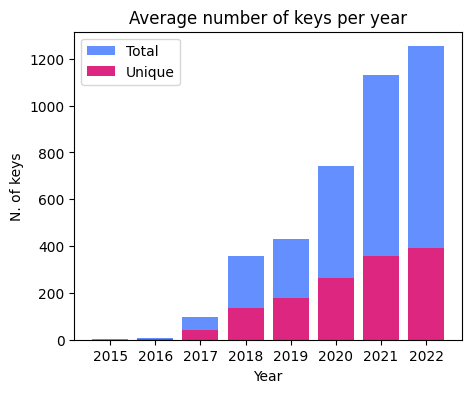

In [47]:
plt.figure(figsize=(5, 4))
plt.title('Average number of keys per year')
plt.xlabel('Year')
plt.ylabel('N. of keys')
plt.bar(y.index, y.numKeys, color='#648fff', label='Total')
plt.bar(y.index, y.numDistKeys, color='#dc267f', label='Unique')
plt.legend(loc='upper left')
plt.savefig("figures/keys_year.pdf", format='pdf', bbox_inches='tight')
plt.show()